## Math 157: Intro to Mathematical Software
## UC San Diego, Winter 2022

### Final project: Wordle and Information Theory by Raghav Maddukuri

## Goal of this lecture

In this lecture we explore how information theory can help us solve and understand Wordle, and learn to apply those concepts to other games as well.

# What is Wordle?

Wordle is an online game you can find here:
https://www.nytimes.com/games/wordle/index.html.
It is a daily challenge where you have to use six guesses to figure out a five letter mystery word.

<img src="wordle-graphic-example.jpg" alt="drawing" width="600"/>

As you can see in the picture above, there is a bit more than randomly guessing words. Each letter in every word you guess will be one three colors for its position in the mystery word. Grey means its not there. Yellow means the letter is in a different position. Green means you got the letter and the position. 

There is a caveat for double letters, in that if there are two of a letter in the answer and in your guess they will both light up. If there is only one in the mystery word, but two in your guess, then one letter will be yellow/green and the other grey.
<img src="double.webp" alt="drawing" width="600"/>

# So How Do we Ruin it?

Wordle is a fun 10 minute way to distract yourself from studying, but as programmers and mathematicians, surely we have to find a way to optimize and solve the puzzle. If we want to solve it lets consider a small game. Lets pick a number from 1 - 100. I can guaruntee that I will always be able to get it in 7 or less guesses. This Julia program below shows what I mean, it will show its guesses and you can see how by guessing higher and lower it will find its number.

In [1]:
function hlower(number)
    guess = 50
    iteration = 1
        while(guess != number)
            if(guess> number)
                guess -= round(50/(2^iteration))
            elseif(guess< number)
                guess += round(50/(2^iteration))
            end
            iteration+=1
            println(guess)
        end
end

hlower (generic function with 1 method)

In [12]:
# hlower(1)
# println()
# hlower(3)
# println()
# hlower(7)
# println()
# hlower(42)
# println()
# hlower(55)
# println()
# hlower(69)

hlower(18)

25.0
13.0
19.0
16.0
18.0


So how does this function isolate a single number despite there being 100? Well I create buckets for the possible number to be in. Guessing higher or lower gives me just as information as the other, and as a result I can constantly half my possible pool of numbers. In Information theory the unit of measurement for halving our pool of guesses is called a bit. A singular bit halves our pool, two makes it a quarter and so on. Tying back to the number game, I can guess the mystery number with 7 bits of information. For this specific case, the number of partitions is 7, but what about a number 1-50, 1-200. With some math we can figure out the probability of guessing the right number. This gets us a probability formula using information, which is simply: $$p=(\frac{1}{2})^I$$ With some clever rewriting we can get the same formula, but using the probability of the event. This is: $$I = -\log_2(p)$$ 


## Probability vs. Information

The formulas above show that Information and Probability are obviously linked, but lets try some real life examples to see the relation.

In this first example consider an even coin, and we need to guess which face landed.

In [13]:
#probability of an even coin is
p=0.5
#Using the information formula we get
I= -log2(p)
print("p(x)="*string(p))
print(", Information="*string(I))

p(x)=0.5, Information=1.0

In the example of a fair coin we can expect to know the result in one guess, hence why the bit value is 1, but what about about a dice. Then we see

In [14]:
#probability of an fair dice is
p=1/6
#Using the information formula we get
I= -log2(p)
print("p(x)="*string(p))
print(", Information="*string(I))

p(x)=0.16666666666666666, Information=2.584962500721156

Here we see that we need on average 2 and a half guesses. Essentially as our choices become more numerous, our guesses become worse. In other words probability and Information are inversely related, as shown by this graph.

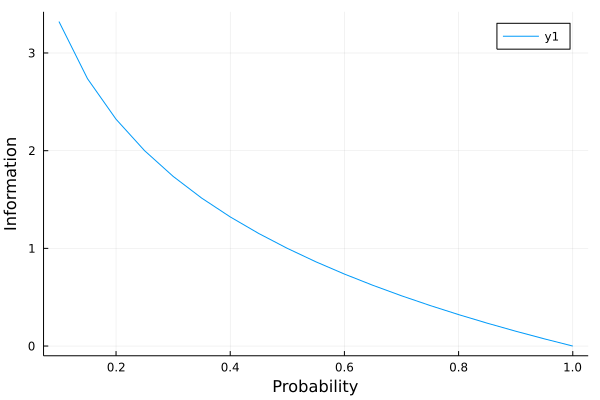

In [5]:
using Plots
x = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
y=[]
for i in x
    append!(y,-log2(i))
end
plot(x,y,xaxis = ("Probability"),yaxis = ("Information"))

We explored the information relation between probability and information, but lets say we wanted to make a best guess for a random event that has some probability distribution. All the examples we explored we knew the exact probability, but lets consider some *continuous random variables*, where instead we have a likely probability, like this picture below: 

 <img src="csv.png" alt="drawing" width="500"/>

Understanding the logic behind these graphs is beyond this class, but essentially to find a probablity, we need to sum a region of probabilities rather than simply pick an choose one. So if we follow the picture above, the probability between 1 and 2, is the sum of each slice under the graph from 1 to 2. If we let $H(X)$ be the expected value of information and N be the the length of the slice, we can represent the expected value of information as the following function: $$H(X)=E=-\sum_i^Np(x)\times\log_2(p(x))$$

Now we have a heuristic for the value of a variable. Essentially now we know the importance of each letter to us. However, now we need to find the probability of each letter.

## Probabilities of each letter

What I propose we do is too use each letter's usage in the total of 5 letter words. For every letter we can create a probability array containing its likely hood to be in each of the 5 letter spots. Then we can simply add the probabilities of each letter in our guess's likelihood to get the total probability of the word, and get the expected information for each word. Afterwards we can find the highest entropy word and use that to find the best guess. For example,according to the chart below "e" is in many words. If we guess "e" we effectively limit the pool of words

Here is the list of all possible guesses for 5-letter words, that I used to generate a probability array: https://github.com/3b1b/videos/blob/master/_2022/wordle/daa/possible_words.txt.

In [6]:
f =open("words.txt")
lines = readlines(f)
close(f)
function prob(letter)
    e = [0,0,0,0,0]
        for i in lines
            if (cmp(letter,string(i[1]))==0)
                e[1]=e[1]+1
            end
            if (cmp(letter,string(i[2]))==0)
                e[2]=e[2]+1
            end
            if (cmp(letter,string(i[3]))==0)
                e[3]=e[3]+1
            end
            if (cmp(letter,string(i[4]))==0)
                e[4]=e[4]+1
            end
            if (cmp(letter,string(i[5]))==0)
                e[5]=e[5]+1
            end
    end
    return e
end

prob (generic function with 1 method)

In [116]:
prob("s")

5-element Vector{Int64}:
 1565
   93
  533
  516
 3958

So if you take a look at the code cell below you will see that I divide the occurences of e by ~13000. This is pool of accepted gueses by wordle. If you want to take a look it is called words.txt in the project directory. However, it is very forgiving in what qualifies as a word. As 3blue1brown put it "the words that would cause fights in Scrabble". 

In [125]:
arr =prob("e")./12972
arr

5-element Vector{Float64}:
 0.02335800185013876
 0.12550107924761023
 0.06799259944495838
 0.179386370644465
 0.11732963305581252

In the above example, I made an array containing the probabilities of 'e' being in each space, but in essence we would do this for every letter in every position. We wouldn't have to do this for every Wordle calculation, instead keeping a list of probabilities that we can later reference. Here is a full chart showing the distribution of each letter and its position.

 <img src="dist.jpg" alt="drawing" width="700"/> 

Now we have the probability of each letter in each position. The next step is to combine this information together to create a graph that contains the probability of all the combinations of whether a letter is there in the mystery word. Recall each letter can be not present, present, and present and in the right position. Below is the example of the probability distribution of a word like "Weary". We see there is a high likelihood that you will get all greys, and that will happen about 14% of the time. As you go down the graph, you the probability of more an more letters matching decreasing rapidly. As you can imagine given the rare nature of "W" and "Y" in the english langauge this is a very low proability, and knowing we aren'T using these letters isn't very informative.


<img src="Edist.JPG" alt="drawing" width="500"/>

How about instead of using something like "WEARY", we use an optimal word. If we look at our distribution above, we see that it would have an "E","A","S","T" & "L". Know any words? "SLATE" is a pretty good anagram of these letters, and below we can see its probability distribution. 

<img src="edist2.JPG" alt="drawing" width="500"/>

If you look at the shape of the graph above, you see its a lot flatter. This isn't a coincidence, because if you consider an event with equal probability, say the dice from before, then we would get 6 columns all of 0.1666 height. As such we want a word, where regardless of the guess it will always limit our pool by a good amount. As you can see above the word slate's most likely scenario where all the letters are grey, narrows down the pool greatly. This scenario happens only 6% of the time, and this gives us an information value of 3.91. 

Using our entropy equation from above we can generate an average expected information value for each word. With this we can generate a best first guess. Then with the information we get from our first guess, we can figure out the probability of each secondary guess using a new probability since the total possibilities of words has shrunk.

Lets create a function that give us the information and probability of the word, so we can plug it into our entropy equation.

In [10]:
# answer will contain a 0,1,2 depending on whether the letter is grey, yellow or green. But for now assume that answer is all 0s.
f =open("words.txt")
lines = readlines(f)
close(f)

function probability(word,answer)
    letters = split(word,"")
    totalwords = 12972
    ourwords=0
    
#   all grey
    if answer[1]==0 && answer[2]==0 && answer[3] ==0 && answer[4] ==0 && answer[5] ==0
        for i in lines
            if occursin(letters[1],i) || occursin(letters[2],i) || occursin(letters[3],i) || occursin(letters[4],i) || occursin(letters[5],i)
                ourwords+=1
            end
        end
        ourwords = totalwords-ourwords
    end
    p = ourwords/totalwords
    information = -log2(p)
    println(information)
    return p
end

probability (generic function with 1 method)

In [11]:
word = "slate"
answer = [0,0,0,0,0]
print(probability(word,answer))
# I =3.91
# p = 0.0667

3.9065569859317195
0.06668208448967006

Above I have coded the probability calculator for if the word has all greys. In the above example we see my favorite word "slate" has about a 6.6 percent of being grey, meaning that 94% of the time I will always get a hint about the mystery word.

The function I wrote at the top is only coded for the the most likely scenario, and to find the optimal word, we need to consider all scenarios of green grey and yellow letters. However, you can already see how some letters are far better than others

In [137]:
# This is considered one of the best words
word = "slate"
answer = [0,0,0,0,0]
println("slate's all grey's probability is: ",probability(word,answer))

# This is also pretty common word, before algorithms broke Wordle
word = "crane"
answer = [0,0,0,0,0]
println("crane's all grey's probability is: ",probability(word,answer))

# This is an overated guess
word = "adieu"
answer = [0,0,0,0,0]
println("adieu's all grey's probability is: ",probability(word,answer))

# This is general considered one of the worst starting words ever
word = "fuzzy"
answer = [0,0,0,0,0]
println("fuzzy's all grey's probability is: ",probability(word,answer))

slate's all grey's probability is: 0.06668208448967006
crane's all grey's probability is: 0.12164662349676225
adieu's all grey's probability is: 0.078245451742214
fuzzy's all grey's probability is: 0.6070767807585569


Feel free to try out some more words, they could even be made up words, they just have to five letters, just follow the format I used above. For this iteration of the answer array keep it all 0s, since we run the operations on the 243 differnt versions of the colors in the Python lecture. This entire lecture was mostly the theory behind how we can solve Wordle with simple agorithms instead of something like Machine learning or NLP. As a result we will take a look at the code, and how to make a Wordle solver and simulator.